In [2]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
n_m = 400
a_m = 1
a_c = 1
q = a_c / a_m
phi_m = 0.003
y_m = phi_m / (1-phi_m)
a_spt = (1+q)**3 - 1
b_spt = 9 * q**2 /2 + 3 * q**3
c_spt = 3 * q**3
Q_spt = a_spt * y_m + b_spt * y_m**2 + c_spt * y_m**3
alpha_spt = (1-phi_m) * np.exp(-1 * Q_spt)
print(alpha_spt)

0.9761532493169941


In [3]:
def osm_pre_vant_hoff(phi_c, v_c, temp=1, k_b=1):
    return phi_c * temp * k_b / v_c

def osm_pre_spt(phi_c, v_c, temp=1, k_b=1):
    return (phi_c + phi_c ** 2 + phi_c ** 3) * temp * k_b / v_c / (1 - phi_c) ** 3

def oms_pre_cs(phi_c, v_c, temp=1, k_b=1):
    return (phi_c + phi_c ** 2 + phi_c ** 3 - phi_c ** 4) * temp * k_b / v_c / (1 - phi_c) ** 3

def oms_pre_virial_3rd(phi_c, v_c, temp=1, k_b=1):
    return (phi_c + 4 * phi_c ** 2 + 10 * phi_c ** 3) * temp * k_b / v_c  


In [17]:
a_c = 1
v_c = np.pi * a_c**3 / 6
phi_c_s = np.arange(0,0.41,0.01)
osm_pre_df = pd.DataFrame.from_dict(
    {"phi_c": phi_c_s,
     "p_vant_hoff": osm_pre_vant_hoff(phi_c_s, v_c),
     "p_vir_3rd": oms_pre_virial_3rd(phi_c_s, v_c),
     "p_spt": osm_pre_spt(phi_c_s, v_c),
     "p_cs": oms_pre_cs(phi_c_s, v_c)}
    )
osm_pre_df = pd.melt(
    osm_pre_df,
    id_vars=['phi_c'],
    value_vars=osm_pre_df.columns.drop('phi_c')
    )
print(osm_pre_df.head())

   phi_c     variable     value
0   0.00  p_vant_hoff  0.000000
1   0.01  p_vant_hoff  0.019099
2   0.02  p_vant_hoff  0.038197
3   0.03  p_vant_hoff  0.057296
4   0.04  p_vant_hoff  0.076394


<Axes: xlabel='phi_c', ylabel='value'>

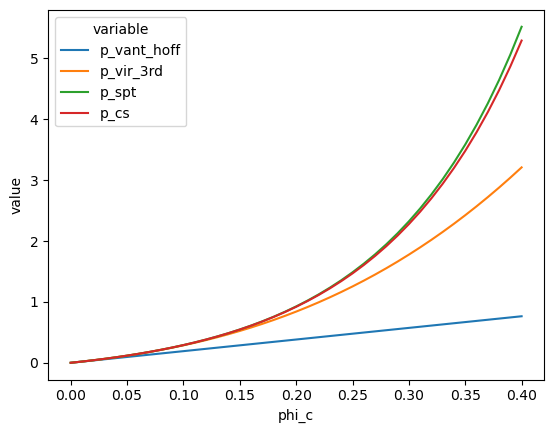

In [18]:
sns.lineplot(
    data=osm_pre_df,
    x='phi_c',
    y='value',
    hue='variable',
    legend='full',
)

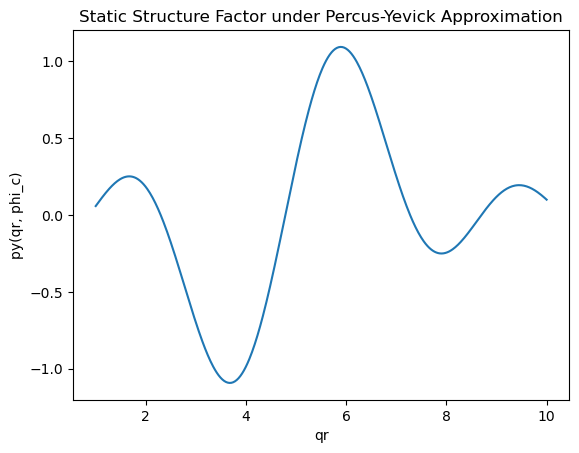

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def py(qr, a, phi_c):
    a = (1 + 2*phi_c)**2 / (1 - phi_c)**4
    b = -6*phi_c*(1 + phi_c/2)**2 / (1 - phi_c)**4
    c = phi_c/2*(1 + 2*phi_c)**2 / (1 - phi_c)**4
    A = 2*qr
    A2 = A**2
    G = (a/A2*(np.sin(A) - A*np.cos(A)) +
         b/(A*A2)*(2*A*np.sin(A) + (2 - A2)*np.cos(A) - 2) +
         c/A**5*(-A**4*np.cos(A) + 4*((3*A2 - 6)*np.cos(A) + A*(A2 - 6)*np.sin(A) + 6)))
    return G

# Define the packing fraction phi_c
phi_c = 0.2

# Generate qr values
qr_values = np.linspace(1, 10, 500)

# Calculate the static structure factor for these values
py_values = [py(qr, 1, phi_c) for qr in qr_values]

# Plot the results
plt.plot(qr_values, py_values)
plt.xlabel('qr')
plt.ylabel('py(qr, phi_c)')
plt.title('Static Structure Factor under Percus-Yevick Approximation')
plt.show()


/var/folders/1v/_3392_yn0fj5p55pq8f468jh0000gn/T/ipykernel_3439/732405339.py:16: RuntimeWarning: invalid value encountered in log
  return -1 * np.log(g_py(r,phi_c))


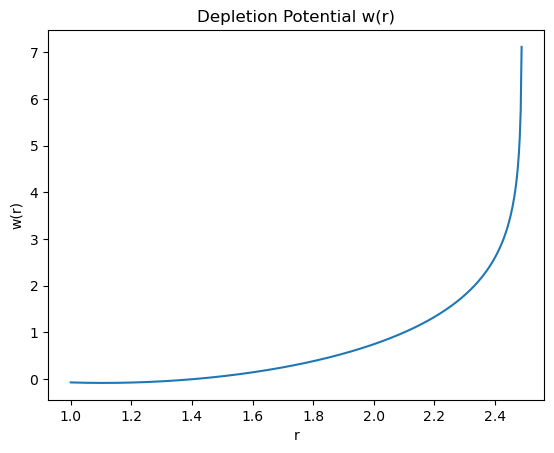

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def g_py(qr, phi_c):
    a = (1 + 2*phi_c)**2 / (1 - phi_c)**4
    b = -6*phi_c*(1 + phi_c/2)**2 / (1 - phi_c)**4
    c = phi_c/2*(1 + 2*phi_c)**2 / (1 - phi_c)**4
    A = 2*qr
    A2 = A**2
    G = (a/A2*(np.sin(A) - A*np.cos(A)) +
         b/(A*A2)*(2*A*np.sin(A) + (2 - A2)*np.cos(A) - 2) +
         c/A**5*(-A**4*np.cos(A) + 4*((3*A2 - 6)*np.cos(A) + A*(A2 - 6)*np.sin(A) + 6)))
    return G

def w(r, phi_c):
    return -1 * np.log(g_py(r,phi_c))

# Define parameters
phi_c = 0.2  # Packing fraction
r_values = np.linspace(1, 2.5, 500)  # r values from 1 to 10

# Calculate w(r) for these r values
w_values = w(r_values, phi_c)

# Plotting
plt.plot(r_values, w_values)
plt.xlabel('r')
plt.ylabel('w(r)')
plt.title('Depletion Potential w(r)')
plt.show()


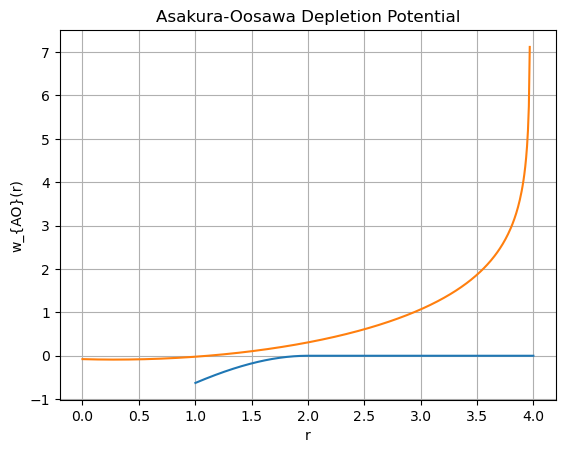

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def asakura_oosawa_potential(r, a_m, a_c, phi_c, kT):
    if r < a_m:
        return np.infty
    if r <= (a_m + a_c) and r >= a_m:
        return -((np.pi * phi_c * kT) / 6) * (1 + (a_m - r)/a_c)**2 * (1 + (2*a_m +r)/ a_c)
    else:
        return 0

# Define parameters
a_m = 1.0        # Radius of colloidal sphere
a_c = 1       # Radius of polymer coil
phi_c = 0.3   # Number density of polymer
kT = 1.0       # Boltzmann constant times temperature

# Generate r values
r_values = np.linspace(0, 2* (a_m+a_c), 500)

# Calculate the potential for these values
potential_values = [asakura_oosawa_potential(r, a_m, a_c, phi_c, kT) for r in r_values]

# Plotting
plt.plot(r_values, potential_values)
plt.plot(r_values, w_values)
plt.xlabel('r')
plt.ylabel('w_{AO}(r)')
plt.title('Asakura-Oosawa Depletion Potential')
plt.grid(True)
plt.show()
